<a href="https://colab.research.google.com/github/Aliza1720/ML-Models/blob/main/ML_in_DD_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install chembl_webresource_client

     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 
     |████████████████████████████████| 636 kB 11.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.0.1 which is incompatible.


In [3]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [4]:
target = new_client.target
target_query = target.search('5-lipoxygenase activating protein')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,5-lipoxygenase/FLAP,31.0,False,CHEMBL2111402,"[{'accession': 'P09917', 'component_descriptio...",PROTEIN COMPLEX,9606.0
1,"[{'xref_id': 'P20292', 'xref_name': None, 'xre...",Homo sapiens,5-lipoxygenase activating protein,28.0,False,CHEMBL4550,"[{'accession': 'P20292', 'component_descriptio...",SINGLE PROTEIN,9606.0
2,[],Rattus norvegicus,Arachidonate 5-lipoxygenase-activating protein,28.0,False,CHEMBL1921661,"[{'accession': 'P20291', 'component_descriptio...",SINGLE PROTEIN,10116.0
3,[],Mus musculus,Arachidonate 5-lipoxygenase-activating protein,28.0,False,CHEMBL3414408,"[{'accession': 'P30355', 'component_descriptio...",SINGLE PROTEIN,10090.0
4,"[{'xref_id': 'P09917', 'xref_name': None, 'xre...",Homo sapiens,Arachidonate 5-lipoxygenase,23.0,False,CHEMBL215,"[{'accession': 'P09917', 'component_descriptio...",SINGLE PROTEIN,9606.0
...,...,...,...,...,...,...,...,...,...
4787,[],Homo sapiens,NTRK1/NTRK2,0.0,False,CHEMBL4523622,"[{'accession': 'P04629', 'component_descriptio...",PROTEIN FAMILY,9606.0
4788,[],Homo sapiens,IKK2/IKK1,0.0,False,CHEMBL4523969,"[{'accession': 'O14920', 'component_descriptio...",SELECTIVITY GROUP,9606.0
4789,[],Homo sapiens,Geranylgeranyl transferase type-2,0.0,False,CHEMBL4523994,"[{'accession': 'P53611', 'component_descriptio...",PROTEIN COMPLEX,9606.0
4790,[],Rattus norvegicus,Geranylgeranyl transferase type-2,0.0,False,CHEMBL4523995,"[{'accession': 'Q08603', 'component_descriptio...",PROTEIN COMPLEX,10116.0


In [5]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL4550'

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [8]:
df = pd.DataFrame.from_dict(res)
df.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,122018,[],CHEMBL618421,Binding affinity of compound for 5-lipoxygenas...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,None,None,CHEMBL1129361,J. Med. Chem.,1996,"{'bei': '16.18', 'le': '0.33', 'lle': '-0.37',...",CHEMBL29097,None,CHEMBL29097,7.64,False,http://www.openphacts.org/units/Nanomolar,162523,=,1,True,=,None,IC50,nM,None,23.0,CHEMBL4550,Homo sapiens,5-lipoxygenase activating protein,9606,None,None,IC50,nM,UO_0000065,None,23.0
1,None,516134,[],CHEMBL618420,The compound was tested for the inhibition of ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)CSC(CCCc1ccc(Cl)cc1)c1ccc(OCc2ccc3ccccc3...,None,None,CHEMBL1126364,Bioorg. Med. Chem. Lett.,1992,"{'bei': '14.05', 'le': '0.28', 'lle': '-0.44',...",CHEMBL32842,None,CHEMBL32842,6.91,False,http://www.openphacts.org/units/Nanomolar,45176,=,1,True,=,None,IC50,nM,None,122.0,CHEMBL4550,Homo sapiens,5-lipoxygenase activating protein,9606,None,None,IC50,nM,UO_0000065,None,122.0
2,None,518659,[],CHEMBL618420,The compound was tested for the inhibition of ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,None,None,CHEMBL1126364,Bioorg. Med. Chem. Lett.,1992,"{'bei': '14.95', 'le': '0.28', 'lle': '-0.08',...",CHEMBL281308,None,CHEMBL281308,8.40,False,http://www.openphacts.org/units/Nanomolar,45173,=,1,True,=,None,IC50,nM,None,4.0,CHEMBL4550,Homo sapiens,5-lipoxygenase activating protein,9606,None,None,IC50,nM,UO_0000065,None,4.0


In [9]:
df.to_csv('FLAP_raw_data.csv', index=False)

In [10]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,122018,[],CHEMBL618421,Binding affinity of compound for 5-lipoxygenas...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,None,None,CHEMBL1129361,J. Med. Chem.,1996,"{'bei': '16.18', 'le': '0.33', 'lle': '-0.37',...",CHEMBL29097,None,CHEMBL29097,7.64,False,http://www.openphacts.org/units/Nanomolar,162523,=,1,True,=,None,IC50,nM,None,23.0,CHEMBL4550,Homo sapiens,5-lipoxygenase activating protein,9606,None,None,IC50,nM,UO_0000065,None,23.0
1,None,516134,[],CHEMBL618420,The compound was tested for the inhibition of ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)CSC(CCCc1ccc(Cl)cc1)c1ccc(OCc2ccc3ccccc3...,None,None,CHEMBL1126364,Bioorg. Med. Chem. Lett.,1992,"{'bei': '14.05', 'le': '0.28', 'lle': '-0.44',...",CHEMBL32842,None,CHEMBL32842,6.91,False,http://www.openphacts.org/units/Nanomolar,45176,=,1,True,=,None,IC50,nM,None,122.0,CHEMBL4550,Homo sapiens,5-lipoxygenase activating protein,9606,None,None,IC50,nM,UO_0000065,None,122.0
2,None,518659,[],CHEMBL618420,The compound was tested for the inhibition of ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,None,None,CHEMBL1126364,Bioorg. Med. Chem. Lett.,1992,"{'bei': '14.95', 'le': '0.28', 'lle': '-0.08',...",CHEMBL281308,None,CHEMBL281308,8.40,False,http://www.openphacts.org/units/Nanomolar,45173,=,1,True,=,None,IC50,nM,None,4.0,CHEMBL4550,Homo sapiens,5-lipoxygenase activating protein,9606,None,None,IC50,nM,UO_0000065,None,4.0


In [11]:
len(df2.canonical_smiles.unique())

698

In [12]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr .head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,122018,[],CHEMBL618421,Binding affinity of compound for 5-lipoxygenas...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,None,None,CHEMBL1129361,J. Med. Chem.,1996,"{'bei': '16.18', 'le': '0.33', 'lle': '-0.37',...",CHEMBL29097,None,CHEMBL29097,7.64,False,http://www.openphacts.org/units/Nanomolar,162523,=,1,True,=,None,IC50,nM,None,23.0,CHEMBL4550,Homo sapiens,5-lipoxygenase activating protein,9606,None,None,IC50,nM,UO_0000065,None,23.0
1,None,516134,[],CHEMBL618420,The compound was tested for the inhibition of ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)CSC(CCCc1ccc(Cl)cc1)c1ccc(OCc2ccc3ccccc3...,None,None,CHEMBL1126364,Bioorg. Med. Chem. Lett.,1992,"{'bei': '14.05', 'le': '0.28', 'lle': '-0.44',...",CHEMBL32842,None,CHEMBL32842,6.91,False,http://www.openphacts.org/units/Nanomolar,45176,=,1,True,=,None,IC50,nM,None,122.0,CHEMBL4550,Homo sapiens,5-lipoxygenase activating protein,9606,None,None,IC50,nM,UO_0000065,None,122.0
2,None,518659,[],CHEMBL618420,The compound was tested for the inhibition of ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,None,None,CHEMBL1126364,Bioorg. Med. Chem. Lett.,1992,"{'bei': '14.95', 'le': '0.28', 'lle': '-0.08',...",CHEMBL281308,None,CHEMBL281308,8.40,False,http://www.openphacts.org/units/Nanomolar,45173,=,1,True,=,None,IC50,nM,None,4.0,CHEMBL4550,Homo sapiens,5-lipoxygenase activating protein,9606,None,None,IC50,nM,UO_0000065,None,4.0


In [13]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3.head(3)

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL29097,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,23.0
1,CHEMBL32842,O=C(O)CSC(CCCc1ccc(Cl)cc1)c1ccc(OCc2ccc3ccccc3...,122.0
2,CHEMBL281308,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,4.0


In [14]:
len(df3)

698

In [15]:
df3.to_csv('FLAP_bioactivity_data_preprocessed.csv', index=False)

In [16]:
df4 = pd.read_csv('FLAP_bioactivity_data_preprocessed.csv')

In [17]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 50:
    bioactivity_threshold.append("weakly active")
  elif float(i)  <= 15:
    bioactivity_threshold.append("highly active")  
  else:
    bioactivity_threshold.append("intermediate")

In [18]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL29097,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,23.0,intermediate
1,CHEMBL32842,O=C(O)CSC(CCCc1ccc(Cl)cc1)c1ccc(OCc2ccc3ccccc3...,122.0,weakly active
2,CHEMBL281308,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,4.0,highly active
3,CHEMBL16596,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,2.0,highly active
4,CHEMBL297661,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,9.3,highly active
...,...,...,...,...
693,CHEMBL4474748,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,47.0,intermediate
694,CHEMBL4563459,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,5.8,highly active
695,CHEMBL4474619,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,34.0,intermediate
696,CHEMBL4542281,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,6.3,highly active


In [19]:
len(df5)

698

In [20]:
df5.to_csv('FLAP_03_bioactivity_data_curated.csv', index=False)

In [21]:
! zip FLAP.zip *.csv

  adding: FLAP_03_bioactivity_data_curated.csv (deflated 86%)
  adding: FLAP_bioactivity_data_preprocessed.csv (deflated 84%)
  adding: FLAP_raw_data.csv (deflated 93%)


In [22]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-08-09 04:40:15--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   162MB/s    in 0.5s    

2021-08-09 04:40:15 (162 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b64

In [23]:
! wget https://github.com/Aliza1720/ML-Models/blob/main/FLAP_03_bioactivity_data_curated.csv

--2021-08-09 04:41:28--  https://github.com/Aliza1720/ML-Models/blob/main/FLAP_03_bioactivity_data_curated.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘FLAP_03_bioactivity_data_curated.csv.1’

FLAP_03_bioactivity     [ <=>                ] 348.11K  --.-KB/s    in 0.1s    

2021-08-09 04:41:29 (3.28 MB/s) - ‘FLAP_03_bioactivity_data_curated.csv.1’ saved [356469]



In [24]:
import pandas as pd


In [25]:
df = pd.read_csv('FLAP_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL29097,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,23.0,intermediate
1,CHEMBL32842,O=C(O)CSC(CCCc1ccc(Cl)cc1)c1ccc(OCc2ccc3ccccc3...,122.0,weakly active
2,CHEMBL281308,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,4.0,highly active
3,CHEMBL16596,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,2.0,highly active
4,CHEMBL297661,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,9.3,highly active
...,...,...,...,...
693,CHEMBL4474748,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,47.0,intermediate
694,CHEMBL4563459,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,5.8,highly active
695,CHEMBL4474619,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,34.0,intermediate
696,CHEMBL4542281,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,6.3,highly active


In [26]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [27]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [28]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL29097,23.0,intermediate,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...
1,CHEMBL32842,122.0,weakly active,O=C(O)CSC(CCCc1ccc(Cl)cc1)c1ccc(OCc2ccc3ccccc3...
2,CHEMBL281308,4.0,highly active,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...
3,CHEMBL16596,2.0,highly active,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...
4,CHEMBL297661,9.3,highly active,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...
...,...,...,...,...
693,CHEMBL4474748,47.0,intermediate,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...
694,CHEMBL4563459,5.8,highly active,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...
695,CHEMBL4474619,34.0,intermediate,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...
696,CHEMBL4542281,6.3,highly active,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...


In [29]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [30]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [31]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,472.094,8.01030,1.0,3.0
1,492.040,7.34900,1.0,4.0
2,561.747,8.48260,1.0,4.0
3,587.185,9.01410,1.0,5.0
4,539.075,7.94572,1.0,4.0
...,...,...,...,...
693,450.499,2.86542,4.0,7.0
694,506.607,4.20632,3.0,7.0
695,470.555,2.39382,3.0,7.0
696,446.511,2.95282,3.0,6.0


In [32]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,472.094,8.01030,1.0,3.0
1,492.040,7.34900,1.0,4.0
2,561.747,8.48260,1.0,4.0
3,587.185,9.01410,1.0,5.0
4,539.075,7.94572,1.0,4.0
...,...,...,...,...
693,450.499,2.86542,4.0,7.0
694,506.607,4.20632,3.0,7.0
695,470.555,2.39382,3.0,7.0
696,446.511,2.95282,3.0,6.0


In [33]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL29097,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,23.0,intermediate
1,CHEMBL32842,O=C(O)CSC(CCCc1ccc(Cl)cc1)c1ccc(OCc2ccc3ccccc3...,122.0,weakly active
2,CHEMBL281308,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,4.0,highly active
3,CHEMBL16596,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,2.0,highly active
4,CHEMBL297661,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,9.3,highly active
...,...,...,...,...
693,CHEMBL4474748,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,47.0,intermediate
694,CHEMBL4563459,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,5.8,highly active
695,CHEMBL4474619,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,34.0,intermediate
696,CHEMBL4542281,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,6.3,highly active


In [34]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [35]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL29097,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,23.0,intermediate,472.094,8.01030,1.0,3.0
1,CHEMBL32842,O=C(O)CSC(CCCc1ccc(Cl)cc1)c1ccc(OCc2ccc3ccccc3...,122.0,weakly active,492.040,7.34900,1.0,4.0
2,CHEMBL281308,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,4.0,highly active,561.747,8.48260,1.0,4.0
3,CHEMBL16596,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,2.0,highly active,587.185,9.01410,1.0,5.0
4,CHEMBL297661,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,9.3,highly active,539.075,7.94572,1.0,4.0
...,...,...,...,...,...,...,...,...
693,CHEMBL4474748,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,47.0,intermediate,450.499,2.86542,4.0,7.0
694,CHEMBL4563459,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,5.8,highly active,506.607,4.20632,3.0,7.0
695,CHEMBL4474619,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,34.0,intermediate,470.555,2.39382,3.0,7.0
696,CHEMBL4542281,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,6.3,highly active,446.511,2.95282,3.0,6.0


In [36]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [37]:
df_combined.standard_value.describe()

count      698.000000
mean       853.852163
std       3072.693879
min          0.800000
25%          5.500000
50%         28.000000
75%        200.000000
max      44000.000000
Name: standard_value, dtype: float64

In [38]:
-np.log10( (10**-9)* 100000000 )

1.0

In [39]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [40]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [41]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL29097,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,intermediate,472.094,8.01030,1.0,3.0,23.0
1,CHEMBL32842,O=C(O)CSC(CCCc1ccc(Cl)cc1)c1ccc(OCc2ccc3ccccc3...,weakly active,492.040,7.34900,1.0,4.0,122.0
2,CHEMBL281308,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,highly active,561.747,8.48260,1.0,4.0,4.0
3,CHEMBL16596,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,highly active,587.185,9.01410,1.0,5.0,2.0
4,CHEMBL297661,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,highly active,539.075,7.94572,1.0,4.0,9.3
...,...,...,...,...,...,...,...,...
693,CHEMBL4474748,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,intermediate,450.499,2.86542,4.0,7.0,47.0
694,CHEMBL4563459,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,highly active,506.607,4.20632,3.0,7.0,5.8
695,CHEMBL4474619,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,intermediate,470.555,2.39382,3.0,7.0,34.0
696,CHEMBL4542281,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,highly active,446.511,2.95282,3.0,6.0,6.3


In [42]:
df_norm.standard_value_norm.describe()

count      698.000000
mean       853.852163
std       3072.693879
min          0.800000
25%          5.500000
50%         28.000000
75%        200.000000
max      44000.000000
Name: standard_value_norm, dtype: float64

In [43]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL29097,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,intermediate,472.094,8.01030,1.0,3.0,7.638272
1,CHEMBL32842,O=C(O)CSC(CCCc1ccc(Cl)cc1)c1ccc(OCc2ccc3ccccc3...,weakly active,492.040,7.34900,1.0,4.0,6.913640
2,CHEMBL281308,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,highly active,561.747,8.48260,1.0,4.0,8.397940
3,CHEMBL16596,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,highly active,587.185,9.01410,1.0,5.0,8.698970
4,CHEMBL297661,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,highly active,539.075,7.94572,1.0,4.0,8.031517
...,...,...,...,...,...,...,...,...
693,CHEMBL4474748,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,intermediate,450.499,2.86542,4.0,7.0,7.327902
694,CHEMBL4563459,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,highly active,506.607,4.20632,3.0,7.0,8.236572
695,CHEMBL4474619,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,intermediate,470.555,2.39382,3.0,7.0,7.468521
696,CHEMBL4542281,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,highly active,446.511,2.95282,3.0,6.0,8.200659


In [44]:
df_final.pIC50.describe()

count    698.000000
mean       7.375894
std        1.063982
min        4.356547
25%        6.698970
50%        7.552842
75%        8.259637
max        9.096910
Name: pIC50, dtype: float64

In [70]:
df_final.to_csv('FLAP_04_pIC50.csv')

In [71]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL32842,O=C(O)CSC(CCCc1ccc(Cl)cc1)c1ccc(OCc2ccc3ccccc3...,weakly active,492.040,7.34900,1.0,4.0,6.913640
2,CHEMBL281308,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,highly active,561.747,8.48260,1.0,4.0,8.397940
3,CHEMBL16596,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,highly active,587.185,9.01410,1.0,5.0,8.698970
4,CHEMBL297661,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,highly active,539.075,7.94572,1.0,4.0,8.031517
5,CHEMBL295761,CC1Cc2c(OCc3ccc(-c4ccccc4)cn3)ccc3c2c(c(CC(C)(...,weakly active,597.180,8.67400,1.0,5.0,5.000000
...,...,...,...,...,...,...,...,...
689,CHEMBL4447921,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,weakly active,434.500,2.69472,3.0,6.0,6.617983
690,CHEMBL4543414,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3c(C...,weakly active,448.527,3.15374,3.0,6.0,6.995679
694,CHEMBL4563459,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,highly active,506.607,4.20632,3.0,7.0,8.236572
696,CHEMBL4542281,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,highly active,446.511,2.95282,3.0,6.0,8.200659


In [72]:
df_2class.to_csv('FLAP_05_PIC50.csv')

In [73]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

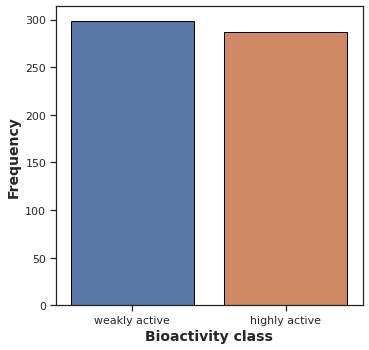

In [74]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

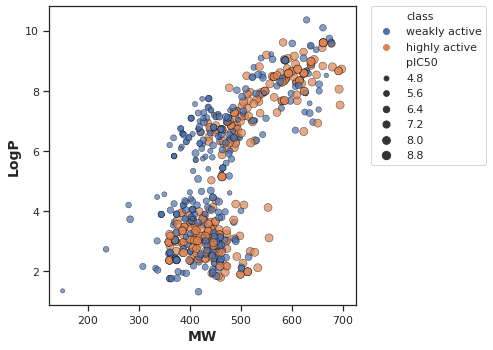

In [75]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

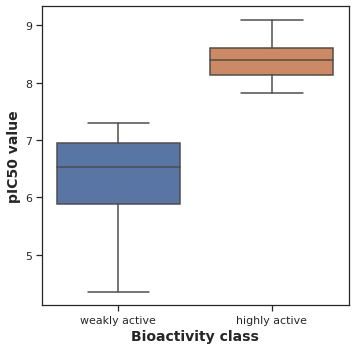

In [76]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [77]:

def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [79]:
mannwhitney('pIC50')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.0,0.05,Different distribution (reject H0)


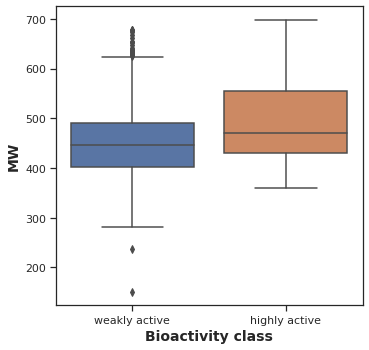

In [80]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [81]:
mannwhitney('MW')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,0.0,0.0,0.05,Different distribution (reject H0)


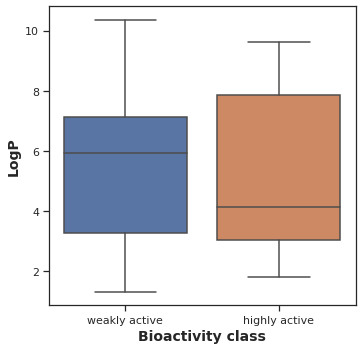

In [82]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [83]:
mannwhitney('LogP')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,0.0,0.0,0.05,Different distribution (reject H0)


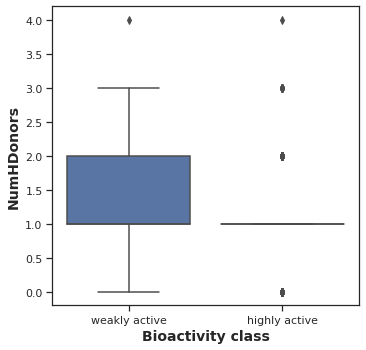

In [85]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [86]:
mannwhitney('NumHDonors')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,0.0,0.0,0.05,Different distribution (reject H0)


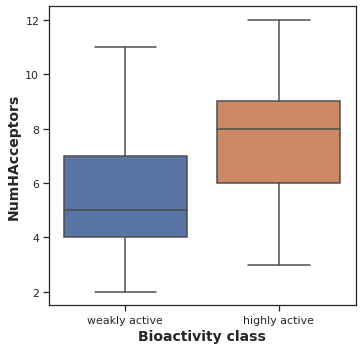

In [87]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [88]:
mannwhitney('NumHAcceptors')


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,0.0,0.0,0.05,Different distribution (reject H0)


In [89]:
! zip -r results.zip . -i *.csv *.pdf

updating: mannwhitneyu_pIC50.csv (deflated 14%)
updating: FLAP_03_bioactivity_data_curated.csv (deflated 86%)
updating: plot_ic50.pdf (deflated 37%)
updating: plot_MW_vs_LogP.pdf (deflated 5%)
updating: plot_NumHAcceptors.pdf (deflated 38%)
updating: FLAP_raw_data.csv (deflated 93%)
updating: acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv (deflated 81%)
updating: acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 81%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 13%)
updating: plot_LogP.pdf (deflated 38%)
updating: mannwhitneyu_LogP.csv (deflated 11%)
updating: plot_MW.pdf (deflated 38%)
updating: plot_NumHDonors.pdf (deflated 38%)
updating: mannwhitneyu_NumHDonors.csv (deflated 13%)
updating: mannwhitneyu_MW.csv (deflated 11%)
updating: plot_bioactivity_class.pdf (deflated 38%)
updating: FLAP_bioactivity_data_preprocessed.csv (deflated 84%)
  adding: FLAP_05_PIC50.csv (deflated 81%)
  adding: FLAP_04_pIC50.csv (deflated 81%)


In [90]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2021-08-09 04:57:37--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2021-08-09 04:57:38--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.1’

padel.zip.1         100%[===================>]  24.57M  54.8MB/s    in 0.4s    

2021-08-09 04:57:38 (54.8 MB/s) - ‘padel.zip.1’ saved [25768637/25768637]

--2021-08-09 04:57:38--  https://g

In [91]:
! unzip padel.zip

Archive:  padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [94]:
! wget https://github.com/Aliza1720/ML-Models/blob/main/FLAP_04_pIC50.csv.csv

--2021-08-09 05:02:59--  https://github.com/Aliza1720/ML-Models/blob/main/FLAP_04_pIC50.csv.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-08-09 05:02:59 ERROR 404: Not Found.



In [95]:
import pandas as pd


In [96]:
df3 = pd.read_csv('FLAP_04_pIC50.csv')

In [97]:
df3


,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL29097,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,intermediate,472.094,8.01030,1.0,3.0,7.638272
1,1,CHEMBL32842,O=C(O)CSC(CCCc1ccc(Cl)cc1)c1ccc(OCc2ccc3ccccc3...,weakly active,492.040,7.34900,1.0,4.0,6.913640
2,2,CHEMBL281308,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,highly active,561.747,8.48260,1.0,4.0,8.397940
3,3,CHEMBL16596,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,highly active,587.185,9.01410,1.0,5.0,8.698970
4,4,CHEMBL297661,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,highly active,539.075,7.94572,1.0,4.0,8.031517
...,...,...,...,...,...,...,...,...,...
693,693,CHEMBL4474748,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,intermediate,450.499,2.86542,4.0,7.0,7.327902
694,694,CHEMBL4563459,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,highly active,506.607,4.20632,3.0,7.0,8.236572
695,695,CHEMBL4474619,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,intermediate,470.555,2.39382,3.0,7.0,7.468521
696,696,CHEMBL4542281,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,highly active,446.511,2.95282,3.0,6.0,8.200659


In [99]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [100]:
! cat molecule.smi | head -5

CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n2Cc1ccc(Cl)cc1	CHEMBL29097
O=C(O)CSC(CCCc1ccc(Cl)cc1)c1ccc(OCc2ccc3ccccc3n2)cc1	CHEMBL32842
O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2ccc3ccccc3n2)cc1	CHEMBL281308
CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3ccc4ccccc4n3)cc12	CHEMBL16596
Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3ccc(-c4ccccc4)cn3)cc12	CHEMBL297661


In [101]:
! cat molecule.smi | wc -l

698


In [102]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [103]:
! bash padel.sh

Processing CHEMBL29097 in molecule.smi (1/698). 
Processing CHEMBL32842 in molecule.smi (2/698). 
Processing CHEMBL281308 in molecule.smi (3/698). Average speed: 5.26 s/mol.
Processing CHEMBL16596 in molecule.smi (4/698). Average speed: 2.95 s/mol.
Processing CHEMBL297661 in molecule.smi (5/698). Average speed: 2.79 s/mol.
Processing CHEMBL295761 in molecule.smi (6/698). Average speed: 2.12 s/mol.
Processing CHEMBL31540 in molecule.smi (7/698). Average speed: 2.59 s/mol.
Processing CHEMBL47539 in molecule.smi (8/698). Average speed: 1.74 s/mol.
Processing CHEMBL50170 in molecule.smi (9/698). Average speed: 1.68 s/mol.
Processing CHEMBL341696 in molecule.smi (10/698). Average speed: 1.48 s/mol.
Processing CHEMBL139891 in molecule.smi (11/698). Average speed: 1.50 s/mol.
Processing CHEMBL138551 in molecule.smi (12/698). Average speed: 1.39 s/mol.
Processing CHEMBL415530 in molecule.smi (13/698). Average speed: 1.40 s/mol.
Processing CHEMBL140157 in molecule.smi (14/698). Average speed: 1

In [104]:
! ls -l

total 136384
-rw-r--r-- 1 root root  1252208 Aug  9 05:08 descriptors_output.csv
-rw-r--r-- 1 root root    65911 Aug  9 04:40 FLAP_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root   356469 Aug  9 04:41 FLAP_03_bioactivity_data_curated.csv.1
-rw-r--r-- 1 root root   107470 Aug  9 04:55 FLAP_04_pIC50.csv
-rw-r--r-- 1 root root    90403 Aug  9 04:56 FLAP_05_PIC50.csv
-rw-r--r-- 1 root root    56245 Aug  9 04:40 FLAP_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root   720431 Aug  9 04:39 FLAP_raw_data.csv
-rw-r--r-- 1 root root    70010 Aug  9 04:40 FLAP.zip
drwxr-xr-x 3 root root     4096 Aug  9 04:51 __MACOSX
-rw-r--r-- 1 root root      101 Aug  9 04:57 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root       99 Aug  9 04:57 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      110 Aug  9 04:57 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      107 Aug  9 04:57 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      102 Aug  9 04:57 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root root 

In [105]:
df3_X = pd.read_csv('descriptors_output.csv')

In [126]:
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
694,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
695,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
696,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [125]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
694,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
695,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
696,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
df3_Y = df3['pIC50']
df3_Y

0      7.638272
1      6.913640
2      8.397940
3      8.698970
4      8.031517
         ...   
693    7.327902
694    8.236572
695    7.468521
696    8.200659
697    6.173925
Name: pIC50, Length: 698, dtype: float64

In [131]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.638272
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.913640
2,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.397940
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.698970
4,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.031517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.327902
694,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.236572
695,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.468521
696,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.200659


In [132]:
dataset3.to_csv('FLAP_06_pIc50.csv', index=False)

In [133]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [134]:
! wget https://github.com/Aliza1720/ML-Models/blob/main/FLAP_06_pIc50.csv

--2021-08-09 05:42:26--  https://github.com/Aliza1720/ML-Models/blob/main/FLAP_06_pIc50.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘FLAP_06_pIc50.csv.1’

FLAP_06_pIc50.csv.1     [  <=>               ] 116.80K   369KB/s    in 0.3s    

2021-08-09 05:42:27 (369 KB/s) - ‘FLAP_06_pIc50.csv.1’ saved [119606]



In [135]:
df = pd.read_csv('FLAP_06_pIc50.csv')

In [136]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
694,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
695,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
696,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
Y = df.pIC50
Y

0      7.638272
1      6.913640
2      8.397940
3      8.698970
4      8.031517
         ...   
693    7.327902
694    8.236572
695    7.468521
696    8.200659
697    6.173925
Name: pIC50, Length: 698, dtype: float64

In [138]:

X.shape

(698, 881)

In [139]:
Y.shape

(698,)

In [140]:
from sklearn.feature_selection import VarianceThreshold

In [141]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [142]:
X.shape

(698, 175)

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [144]:
X_train.shape, Y_train.shape

((558, 175), (558,))

In [145]:
X_test.shape, Y_test.shape

((140, 175), (140,))

In [146]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.28035072340723455

In [147]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show>

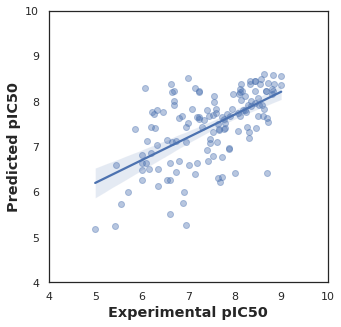

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(4, 10)
ax.set_ylim(4, 10)
ax.figure.set_size_inches(5, 5)
plt.show

In [149]:
! pip install lazypredict

     |████████████████████████████████| 6.8 MB 5.1 MB/s 
     |████████████████████████████████| 10.1 MB 27.6 MB/s 
     |████████████████████████████████| 82 kB 976 kB/s 
     |████████████████████████████████| 269 kB 34.8 MB/s 
     |████████████████████████████████| 1.2 MB 35.2 MB/s 
     |████████████████████████████████| 72 kB 926 kB/s 
     |████████████████████████████████| 248 kB 63.7 MB/s 
     |████████████████████████████████| 14.5 MB 7.3 kB/s 
     |████████████████████████████████| 25.9 MB 674 bytes/s 
     |████████████████████████████████| 302 kB 69.7 MB/s 
     |████████████████████████████████| 127.6 MB 10 kB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 97 kB 5.7 MB/s 
     |████████████████████████████████| 40 kB 4.1 MB/s 
     |████████████████████████████████| 48 kB 4.7 MB/s 
     |████████████████████████████████| 67 kB 5.3 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=

In [150]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [151]:
! wget https://github.com/Aliza1720/ML-Models/blob/main/FLAP_06_pIc50.csv

--2021-08-09 05:46:47--  https://github.com/Aliza1720/ML-Models/blob/main/FLAP_06_pIc50.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘FLAP_06_pIc50.csv.2’

FLAP_06_pIc50.csv.2     [ <=>                ] 121.24K  --.-KB/s    in 0.08s   

2021-08-09 05:46:47 (1.52 MB/s) - ‘FLAP_06_pIc50.csv.2’ saved [124145]



In [153]:
df = pd.read_csv('FLAP_06_pIc50.csv')

In [154]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [155]:
X.shape

(698, 881)

In [156]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(698, 175)

In [157]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 95%|█████████▍| 36/38 [00:19<00:00,  2.90it/s]

[05:48:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 38/38 [00:00<00:00, 123361.88it/s]


In [158]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.85,0.90,0.35,0.15
DecisionTreeRegressor,0.85,0.90,0.35,0.07
ExtraTreeRegressor,0.85,0.90,0.35,0.05
ExtraTreesRegressor,0.85,0.90,0.35,0.97
RandomForestRegressor,0.78,0.85,0.42,0.90
BaggingRegressor,0.75,0.83,0.46,0.11
MLPRegressor,0.68,0.78,0.51,1.29
LGBMRegressor,0.65,0.76,0.53,0.16
HistGradientBoostingRegressor,0.65,0.76,0.53,1.54


In [161]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.85,0.90,0.35,0.15
DecisionTreeRegressor,0.85,0.90,0.35,0.07
ExtraTreeRegressor,0.85,0.90,0.35,0.05
ExtraTreesRegressor,0.85,0.90,0.35,0.97
RandomForestRegressor,0.78,0.85,0.42,0.90
BaggingRegressor,0.75,0.83,0.46,0.11
MLPRegressor,0.68,0.78,0.51,1.29
LGBMRegressor,0.65,0.76,0.53,0.16
HistGradientBoostingRegressor,0.65,0.76,0.53,1.54


[(0.0, 1.0)]

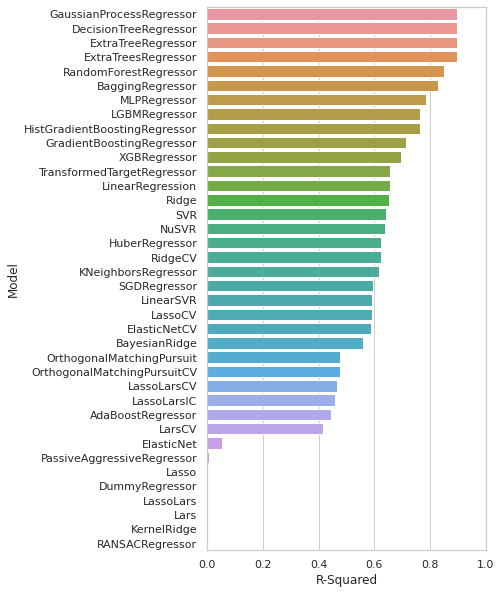

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

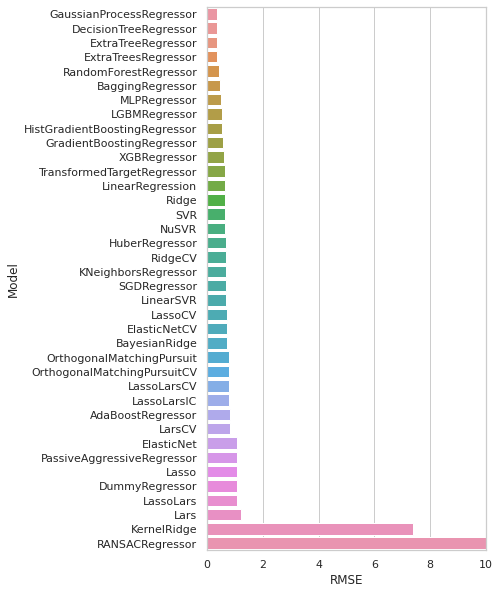

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))